In [1]:
#--------Import packages
#--------For Netcdf manipulation
import statsmodels.tsa.stattools
import xarray as xr
from netCDF4 import Dataset
import netCDF4 as nc

#--------For array manipulation
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Grouper

#--------For plotting
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# import matplotlib.pylab as plt
from mpl_toolkits.basemap import Basemap # plots maps
from matplotlib.cbook import dedent
#import cmocean
import seaborn as sns

In [2]:
#-----Read in volume dataset as dataframe
vol_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/vol_mean_abs.csv')
#-----Read in SAM as dataframe
sam_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/sam_long.csv',parse_dates=['Dates'])
#-----Read in dates  as dataframe
dates_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/CCF/dates_df.csv')

In [3]:
dates_df['Dates'] = dates_df['Dates'].astype('datetime64[ns]')
sam_df = sam_df.drop(["Years", "Months"], axis=1)

# Get dates  for only May -October
sam_df = sam_df[(sam_df.Dates.dt.month >= 5) & (sam_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
sam_df = sam_df.set_index('Dates')
sam_df = sam_df.loc['2002-05-01':'2018-10-01']
## Removing the first 5 rows/dates
sam_df  = sam_df.iloc[5:]

In [4]:
# we now want the 'Dates' as a normal column and not an index
sam_df = sam_df.reset_index()
# Combining the SAM and SIV Dates
df_new = sam_df.copy()
df_new["SIV"] = vol_df["SIV"]

In [5]:
df_new

,Dates,SAM,SIV
0,2007-05-01,-1.02,1123.249095
1,2008-05-01,-0.66,739.475298
2,2009-05-01,-0.14,968.900120
3,2010-05-01,1.51,973.981453
4,2011-05-01,1.37,854.359283
...,...,...,...
92,2014-10-01,1.32,1017.586997
93,2015-10-01,-0.66,1271.630218
94,2016-10-01,-0.89,1336.782919
95,2017-10-01,-0.64,1258.799548


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *
dir = '/Users/fridaperez/Developer/repos/local_repo/pub_plots/Amundsen-Bellingshausen/'

def month_ccf_sam(df):
    x = [5,6,7,8,9,10]
    df_selmons = []
    df_vol_selmons = []
    df_sam_selmons = []
    cdfs = []
    df_list = []
    ind0 = 0
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SAM, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SAM #
        df_sam_selmon = df_selmon[['Dates', 'SAM']]
        df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
        df_sam_selmon = df_sam_selmon.set_index(['Dates'])
        df_sam_selmons.append(df_sam_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row =0 if i <= 2 else 1
            col = i if i <=2 else i-3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_sam_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_sam_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SAM (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0],3), x = .95, y = 0.05, transform = axes[row, col].transAxes, ha = 'right') #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


         CCF
0  -0.247039
1   0.282581
2  -0.205732
3   0.385142
4  -0.173375
5  -0.033312
6   0.214276
7  -0.230495
8   0.206176
9  -0.356763
10  0.229577
11 -0.020975
         CCF
0  -0.015218
1   0.147341
2   0.011640
3   0.387005
4   0.264532
5   0.157267
6  -0.509397
7  -0.175956
8   0.104691
9   0.349827
10  0.108901
11 -0.024314
12 -0.044448
13 -0.235560
14 -0.117493
15  0.018750
16  0.103300
         CCF
0  -0.270294
1   0.086521
2   0.231196
3  -0.026228
4   0.198349
5  -0.077795
6  -0.189684
7   0.224037
8   0.029560
9  -0.191513
10  0.110019
11 -0.052167
12 -0.018789
13  0.091158
14  0.016802
15 -0.025175
16 -0.007402
         CCF
0  -0.233463
1   0.033561
2   0.083942
3   0.021891
4  -0.308891
5   0.062741
6   0.284691
7   0.025863
8   0.048362
9   0.019888
10 -0.132932
11 -0.062281
12  0.002484
13  0.007009
14  0.026818
15  0.005982
16  0.002346
         CCF
0   0.432695
1  -0.028231
2  -0.166955
3  -0.072882
4   0.039584
5   0.334254
6   0.132551
7   0.102219
8  -0.136498

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/990713805.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/990713805.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sam_selmon['Dates'] = df_sam_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/990713805.py:29: SettingWithCopyWarning: 
A value is trying

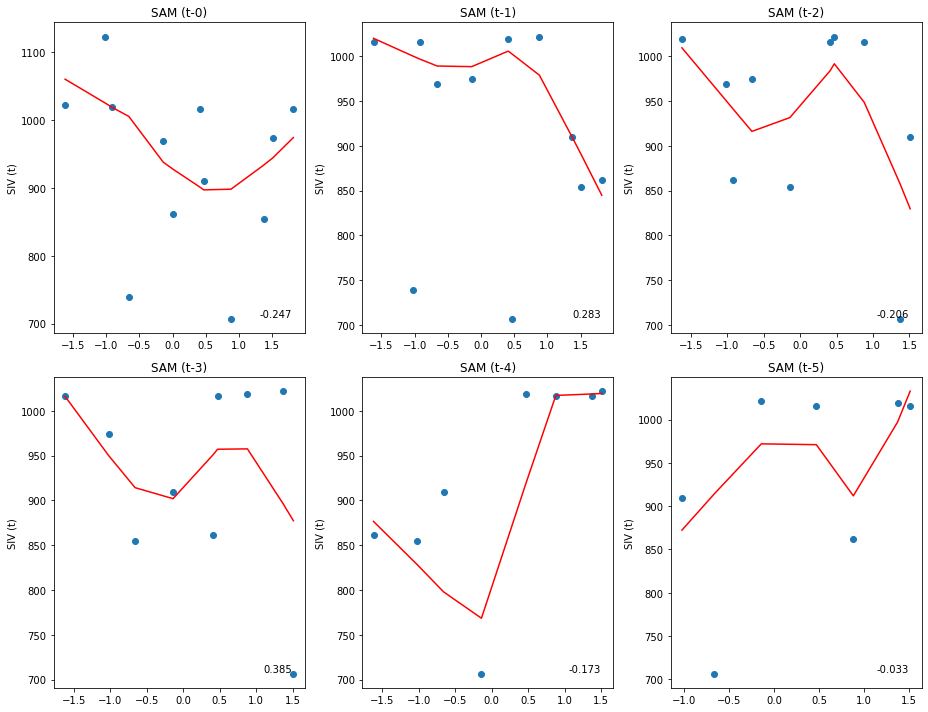

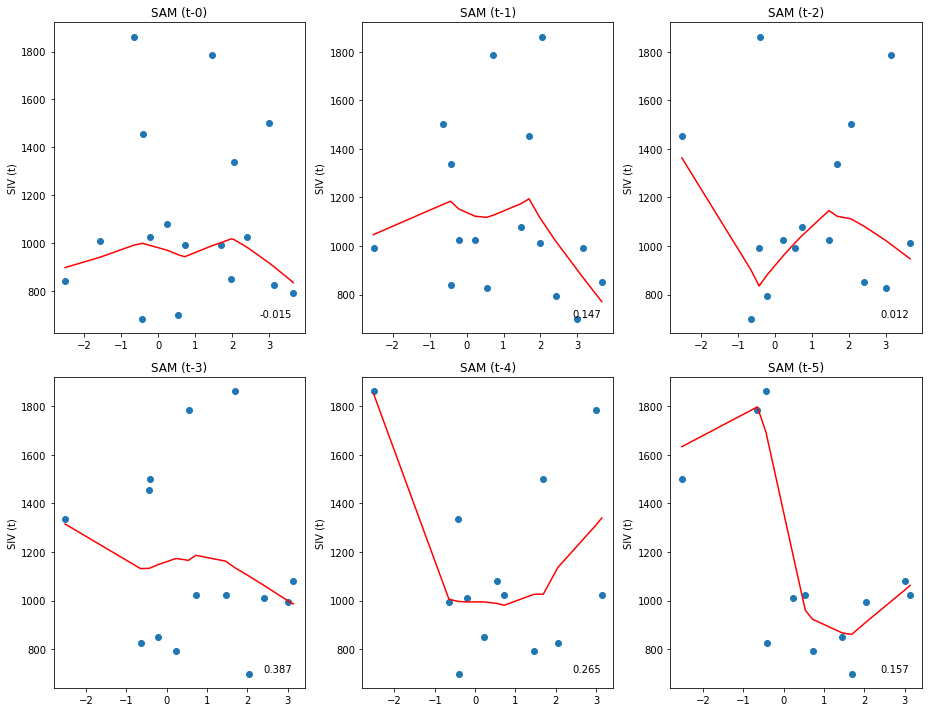

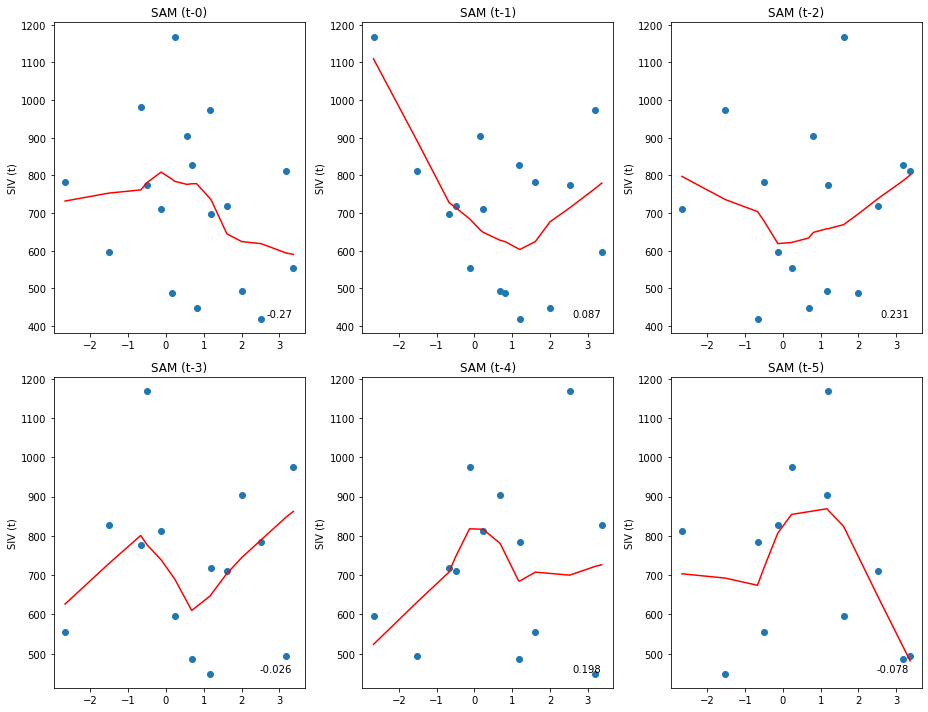

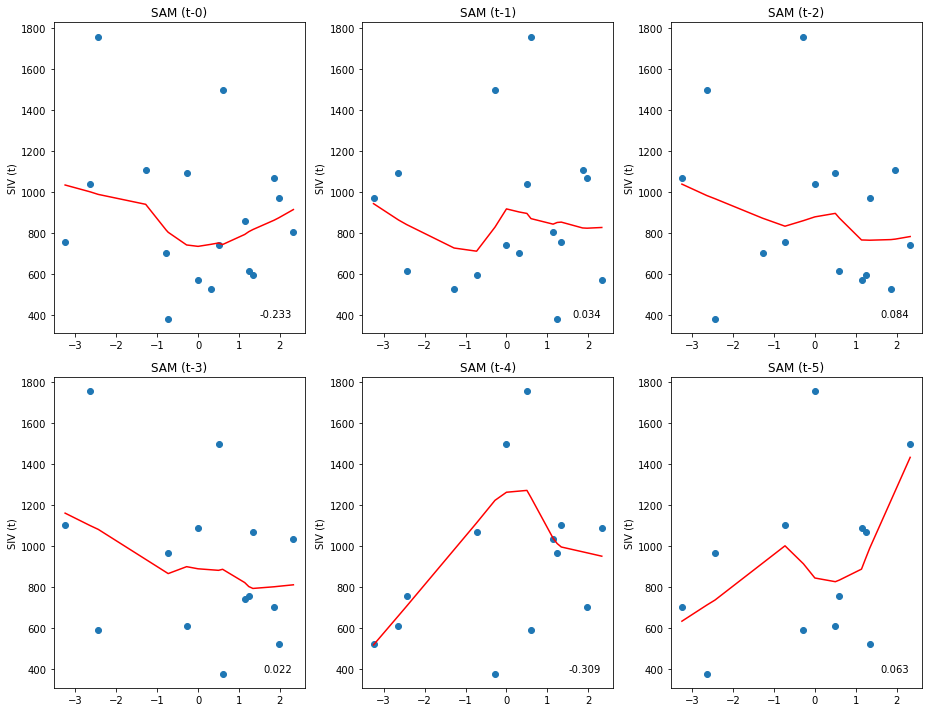

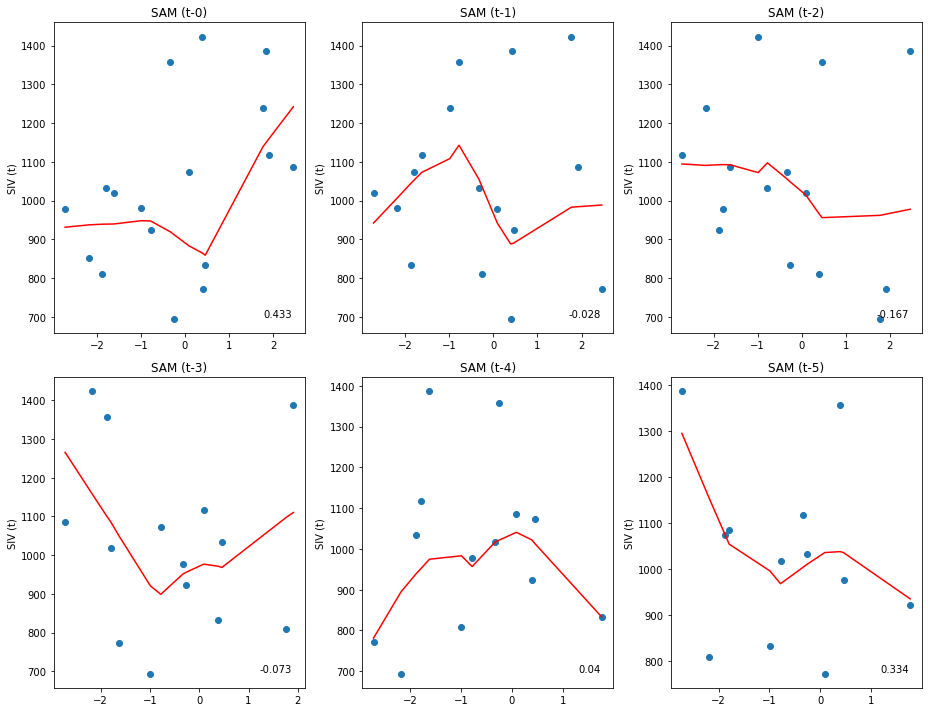

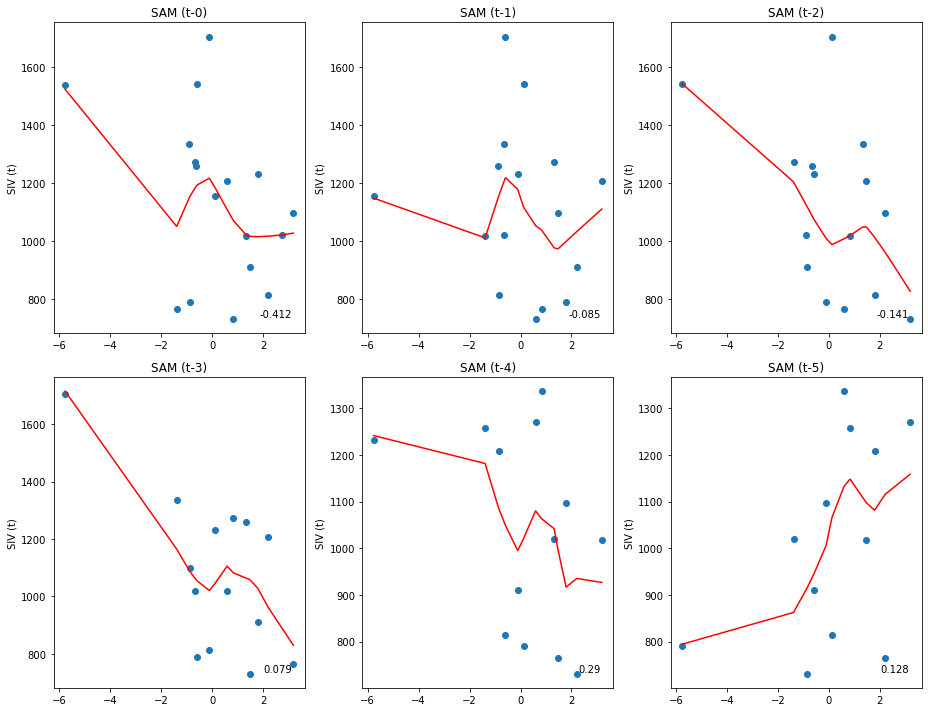

In [9]:
month_ccf_sam(df_new)

## SOI

In [10]:
#-----Read in SOI as dataframe
soi_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/SOI_index.csv')

In [11]:

# have to use pandas melt to go from wide to long data
soi_melt = pd.melt(soi_df, id_vars='Years')
soi_melt = soi_melt.rename(columns={"variable":"Month"})
soi_melt['Dates'] = pd.to_datetime(soi_melt[['Years', 'Month']].assign(DAY=1))

In [13]:
soi_melt = soi_melt.drop(["Years", "Month"], axis=1)
soi_melt['Dates'] = soi_melt['Dates'].astype('datetime64[ns]')

In [14]:
# Get dates  for only May -October
soi_melt = soi_melt[(soi_melt.Dates.dt.month >= 5) & (soi_melt.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
soi_melt = soi_melt.set_index('Dates')
soi_melt = soi_melt.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
soi_melt  = soi_melt.iloc[5:]

In [15]:
# # we now want the 'Dates' as a normal column and not an index
soi_melt = soi_melt.reset_index()
soi_melt.rename(columns={'SOI': 'value'}, inplace=True)

# # Combining the SAM and SIV Dates
df_new_soi = soi_melt.copy()
df_new_soi["SIV"] = vol_df["SIV"]


In [16]:
df_new_soi.reset_index()

,index,Dates,value,SIV
0,0,2007-05-01,0.9,1123.249095
1,1,2008-05-01,1.3,739.475298
2,2,2009-05-01,-0.3,968.900120
3,3,2010-05-01,-0.7,973.981453
4,4,2011-05-01,1.1,854.359283
...,...,...,...,...
92,92,2014-10-01,1.0,1017.586997
93,93,2015-10-01,3.2,1271.630218
94,94,2016-10-01,-0.2,1336.782919
95,95,2017-10-01,-1.2,1258.799548


In [17]:
df_new_soi.rename(columns = {'value':'SOI'}, inplace = True)

In [19]:
df_new_soi

,Dates,SOI,SIV
0,2007-05-01,0.9,1123.249095
1,2008-05-01,1.3,739.475298
2,2009-05-01,-0.3,968.900120
3,2010-05-01,-0.7,973.981453
4,2011-05-01,1.1,854.359283
...,...,...,...
92,2014-10-01,1.0,1017.586997
93,2015-10-01,3.2,1271.630218
94,2016-10-01,-0.2,1336.782919
95,2017-10-01,-1.2,1258.799548


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_soi(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_soi_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.SOI, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_soi_selmon = df_selmon[['Dates', 'SOI']]
        df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
        df_soi_selmon = df_soi_selmon.set_index(['Dates'])
        df_soi_selmons.append(df_soi_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_soi_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_soi_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"SOI (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))



         CCF
0   0.022367
1   0.388881
2  -0.177297
3  -0.196008
4   0.024552
5   0.057230
6  -0.154116
7  -0.307604
8   0.405619
9  -0.116253
10 -0.088379
11  0.111868
         CCF
0  -0.247531
1  -0.476285
2  -0.358898
3   0.280849
4   0.185260
5   0.193065
6  -0.152957
7  -0.092764
8  -0.308629
9  -0.177826
10  0.218901
11  0.264113
12  0.115002
13  0.051432
14  0.015557
15 -0.092133
16 -0.067524
         CCF
0  -0.075543
1   0.230249
2   0.098737
3  -0.084748
4  -0.203761
5  -0.250997
6   0.184967
7   0.333049
8  -0.027179
9   0.050065
10 -0.204564
11 -0.313284
12  0.069133
13  0.180022
14  0.047993
15 -0.020544
16 -0.068827
         CCF
0   0.049464
1  -0.490796
2  -0.442633
3  -0.161813
4  -0.178839
5   0.374823
6   0.702416
7   0.088729
8  -0.150219
9  -0.169625
10 -0.240374
11 -0.120429
12  0.049530
13  0.060790
14  0.044758
15  0.010698
16  0.002524
         CCF
0  -0.143792
1   0.310510
2   0.128395
3   0.049209
4   0.025873
5  -0.046455
6  -0.201342
7   0.050262
8  -0.141105

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/4005262726.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/4005262726.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_soi_selmon['Dates'] = df_soi_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/4005262726.py:27: SettingWithCopyWarning: 
A value is try

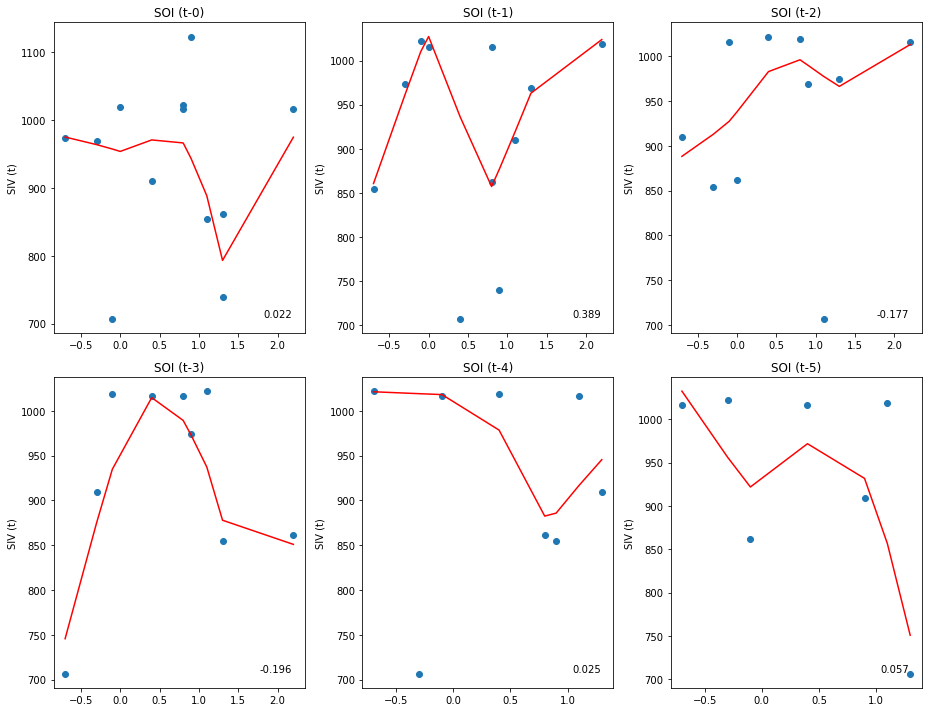

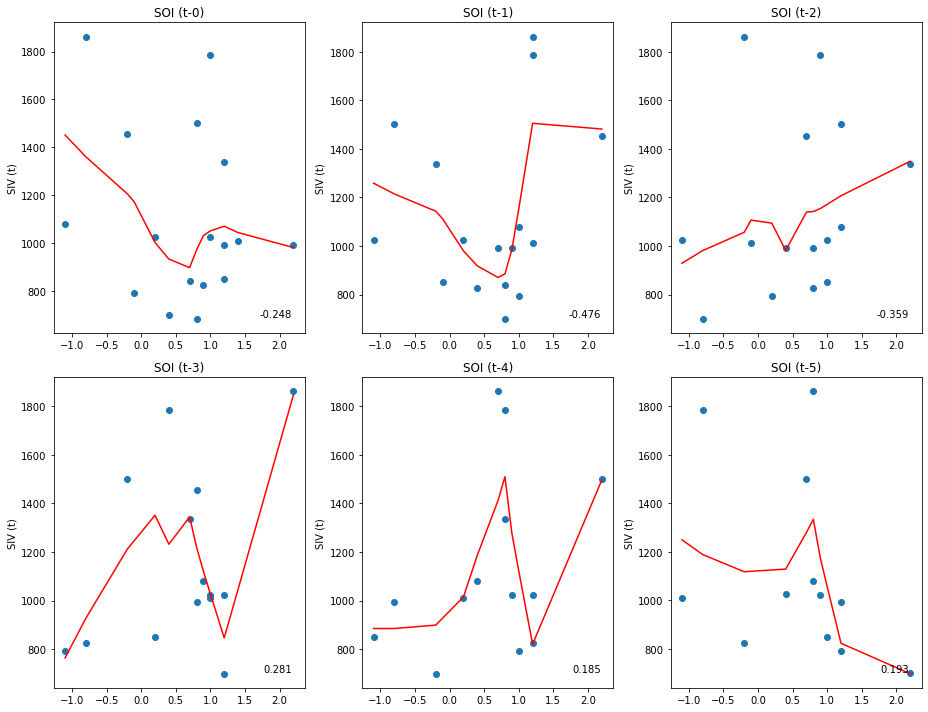

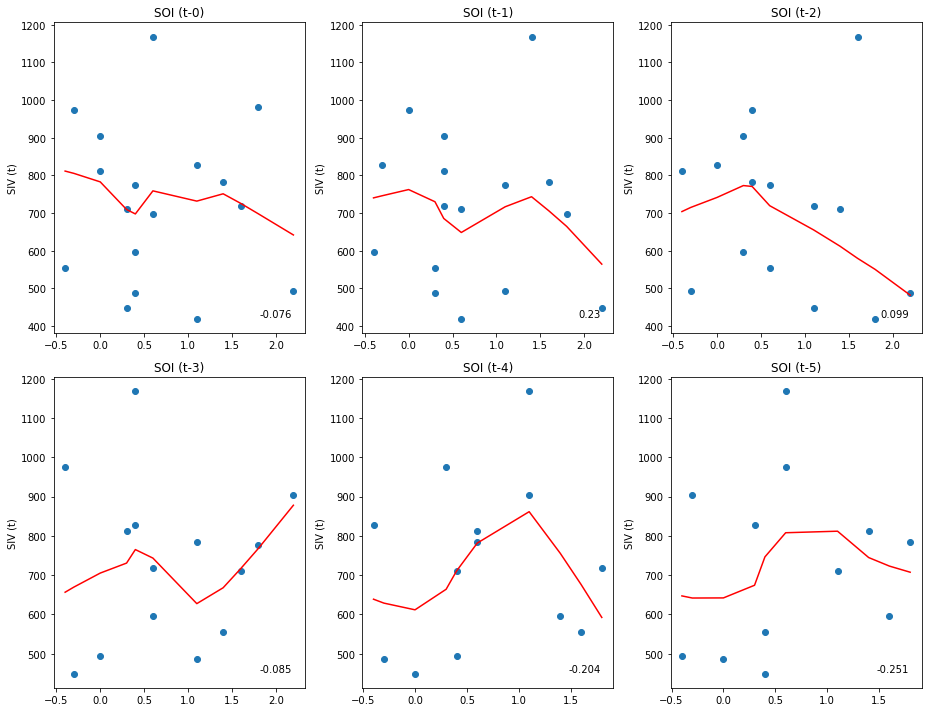

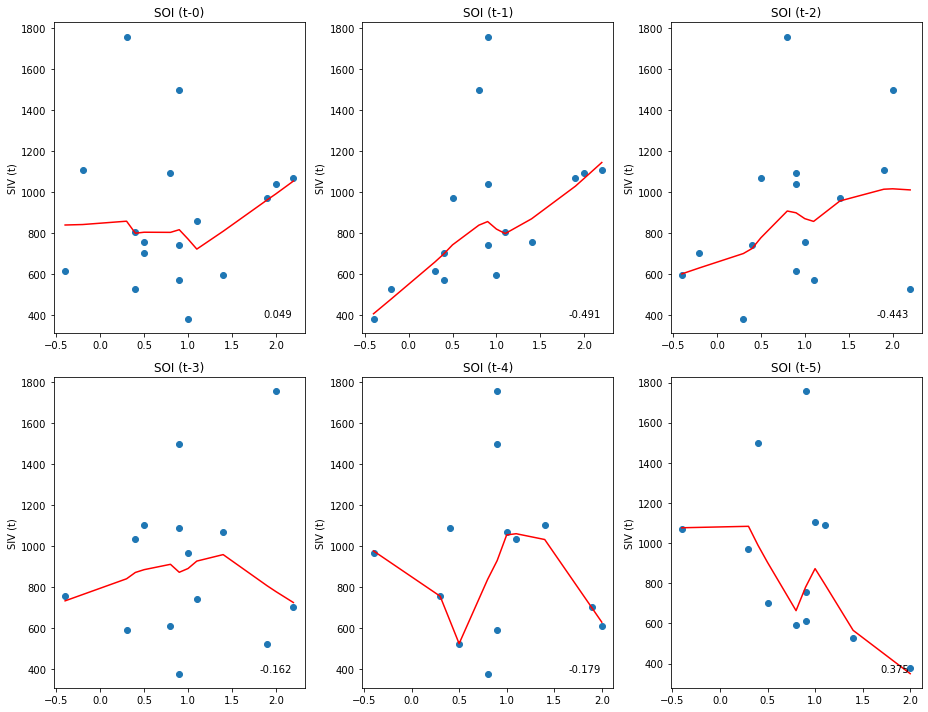

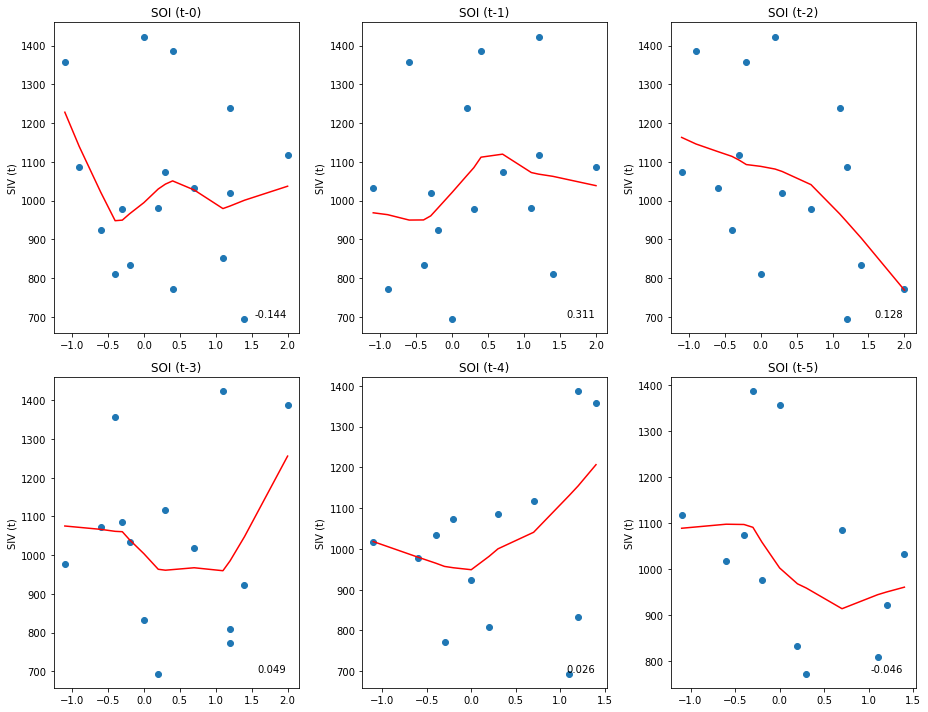

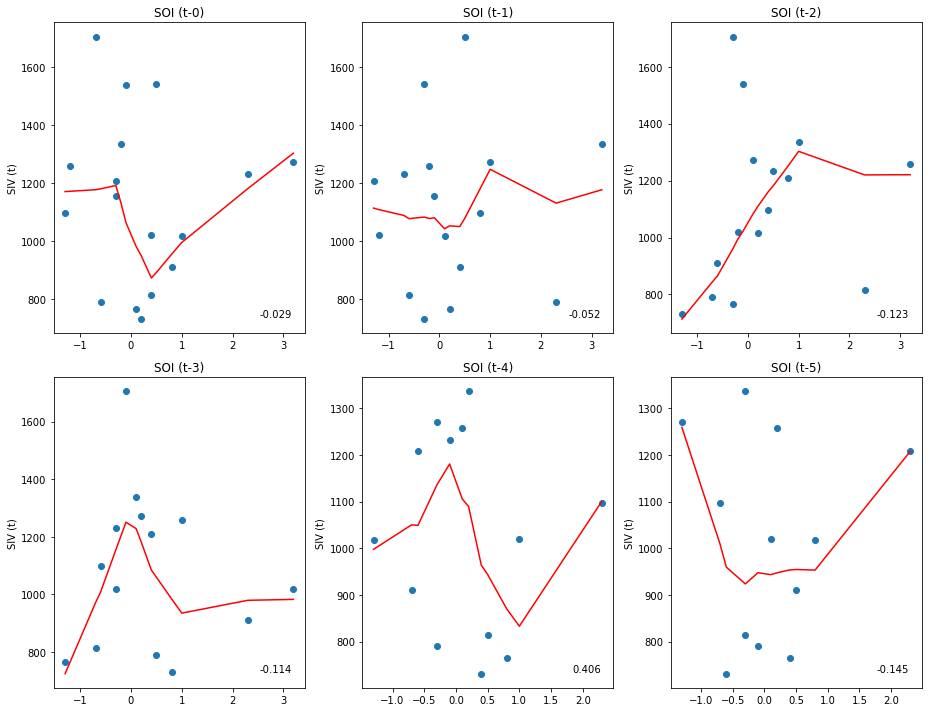

In [21]:
month_ccf_soi(df_new_soi)

## ASL

In [22]:
#-----Read in ASL as dataframe
asl_df = pd.read_csv('/Users/fridaperez/Developer/repos/local_repo/AtmosIndex/ASL_index.csv')

In [23]:
asl_df = asl_df.drop(["Lon", "Lat","SectorPres", "RelCenPres"], axis=1)
asl_df['Dates'] = asl_df['Dates'].astype('datetime64[ns]')
#print(asl_df)

In [24]:
# Get dates  for only May -October
asl_df = asl_df[(asl_df.Dates.dt.month >= 5) & (asl_df.Dates.dt.month <= 10)]
# Here we set the index so that we can filter using iloc
asl_df = asl_df.set_index('Dates')
asl_df = asl_df.loc['2002-05-01':'2018-10-01']
# ## Removing the first 5 rows/dates
#asl_df  = asl_df.iloc[5:]
print(asl_df)

            ActCenPres
Dates                 
2002-10-01  986.911499
2003-05-01  967.435608
2003-06-01  985.111511
2003-07-01  969.911377
2003-08-01  972.973511
...                ...
2018-06-01  972.353699
2018-07-01  977.746094
2018-08-01  978.081421
2018-09-01  970.656189
2018-10-01  965.293152

[97 rows x 1 columns]


In [25]:
# # we now want the 'Dates' as a normal column and not an index
asl_df = asl_df.reset_index()
print(asl_df)

        Dates  ActCenPres
0  2002-10-01  986.911499
1  2003-05-01  967.435608
2  2003-06-01  985.111511
3  2003-07-01  969.911377
4  2003-08-01  972.973511
..        ...         ...
92 2018-06-01  972.353699
93 2018-07-01  977.746094
94 2018-08-01  978.081421
95 2018-09-01  970.656189
96 2018-10-01  965.293152

[97 rows x 2 columns]


In [26]:
# # Combining the SAM and SIV Dates
df_new_asl = asl_df.copy()
df_new_asl["SIV"] = vol_df["SIV"]
print(df_new_asl)

        Dates  ActCenPres          SIV
0  2002-10-01  986.911499  1123.249095
1  2003-05-01  967.435608   739.475298
2  2003-06-01  985.111511   968.900120
3  2003-07-01  969.911377   973.981453
4  2003-08-01  972.973511   854.359283
..        ...         ...          ...
92 2018-06-01  972.353699  1017.586997
93 2018-07-01  977.746094  1271.630218
94 2018-08-01  978.081421  1336.782919
95 2018-09-01  970.656189  1258.799548
96 2018-10-01  965.293152  1019.990329

[97 rows x 3 columns]


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import rpy2.robjects as robjects
import statsmodels.api as sm
from statsmodels.formula.api import ols

from astsadata import *


def month_ccf_asl(df):
    x = [5, 6, 7, 8, 9, 10]
    df_selmons = []
    df_vol_selmons = []
    df_asl_selmons = []
    cdfs = []
    for i in x:
        df_selmon = df[df['Dates'].dt.month.isin([i])]
        ccf_df = statsmodels.tsa.stattools.ccf(df_selmon.ActCenPres, df_selmon.SIV, adjusted=False)
        ccf_df = pd.DataFrame(ccf_df, columns=['CCF'])
        df_selmons.append(df_selmon)
        print(ccf_df)
        cdfs.append(ccf_df)
        ## Separate the two columns
        # SIV #
        df_vol_selmon = df_selmon[['Dates', 'SIV']]
        df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
        df_vol_selmon = df_vol_selmon.set_index(['Dates'])
        df_vol_selmons.append(df_vol_selmon)
        # SOI #
        df_asl_selmon = df_selmon[['Dates', 'ActCenPres']]
        df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
        df_asl_selmon = df_asl_selmon.set_index(['Dates'])
        df_asl_selmons.append(df_asl_selmon)
        #return cdfs
    # PLOT #
    for x in range(6):

        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13, 10))
        lag = 0
        for i in range(6):
            row = 0 if i <= 2 else 1
            col = i if i <= 2 else i - 3
            lowess = sm.nonparametric.lowess(df_vol_selmons[x].iloc[:, 0], df_asl_selmons[x].iloc[:, 0].shift(lag))
            axes[row, col].scatter(df_asl_selmons[x].shift(lag), df_vol_selmons[x])
            axes[row, col].set_title(f"ASL (t-{lag})")
            axes[row, col].set_ylabel("SIV (t)")
            axes[row, col].plot(lowess[:, 0], lowess[:, 1], color="red")
            axes[row, col].text(s=round(cdfs[x].loc[i][0], 3), x=.95, y=0.05, transform=axes[row, col].transAxes,
                                ha='right')  #ha, horizontal line
            lag += 1
        fig.tight_layout()
        plt.savefig(dir + str(x))


         CCF
0   0.153023
1   0.018249
2  -0.146406
3  -0.012530
4   0.060376
5   0.047789
6  -0.298631
7  -0.021690
8   0.146474
9   0.087721
10 -0.116110
11  0.177545
12 -0.040924
13 -0.110044
14  0.049751
15 -0.002701
         CCF
0  -0.016790
1   0.152098
2  -0.095366
3   0.087464
4   0.196898
5  -0.006476
6   0.244806
7   0.013917
8   0.100395
9   0.045757
10 -0.002688
11 -0.039055
12 -0.028947
13 -0.045851
14 -0.024946
15 -0.023272
         CCF
0   0.038766
1  -0.050920
2   0.452925
3   0.156824
4   0.169276
5  -0.161424
6  -0.031884
7  -0.168738
8  -0.149258
9  -0.036987
10 -0.102813
11  0.183368
12  0.015418
13  0.030027
14  0.002841
15 -0.000132
         CCF
0   0.251536
1  -0.199394
2   0.542875
3   0.092631
4  -0.159999
5  -0.082640
6  -0.202803
7   0.449244
8  -0.232414
9  -0.120130
10  0.031536
11  0.010835
12  0.052583
13 -0.000743
14  0.044517
15 -0.034736
         CCF
0  -0.172746
1   0.033855
2  -0.147857
3  -0.427186
4   0.159608
5  -0.194847
6   0.192998
7   0.031092

/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/2568138697.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vol_selmon['Dates'] = df_vol_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/2568138697.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_asl_selmon['Dates'] = df_asl_selmon['Dates'].dt.to_period('M')
/var/folders/f1/8zx2wbhx4vb8626x_99mwyx40000gn/T/ipykernel_85723/2568138697.py:27: SettingWithCopyWarning: 
A value is try

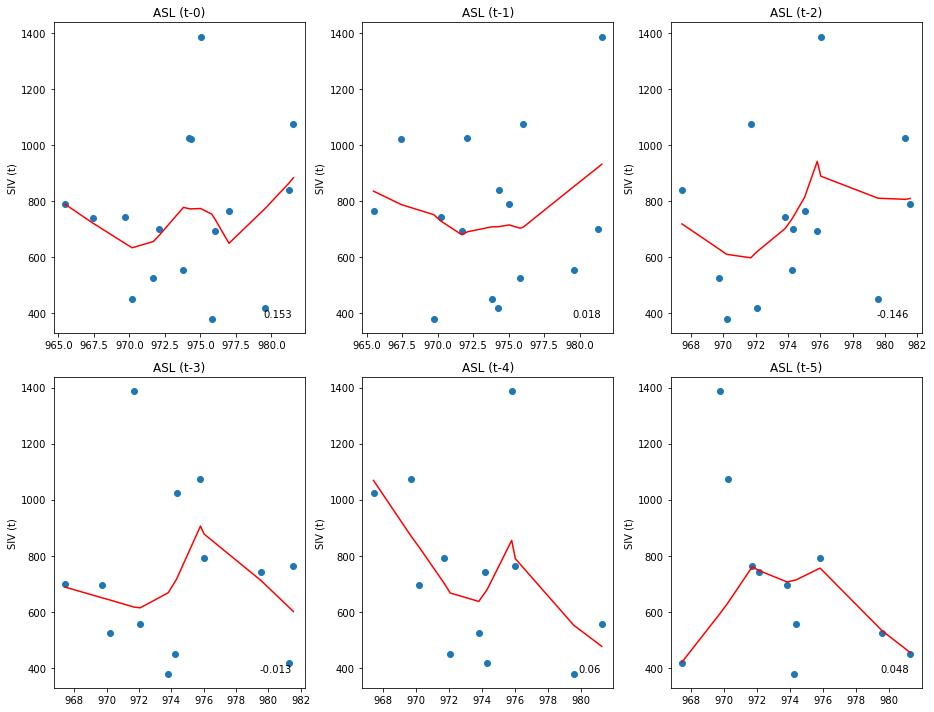

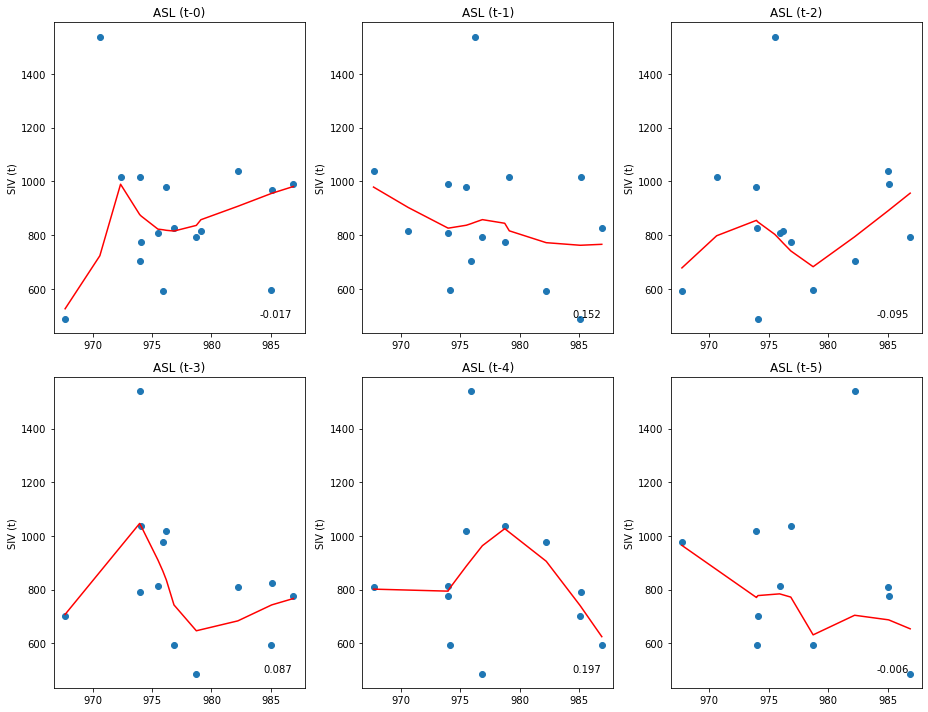

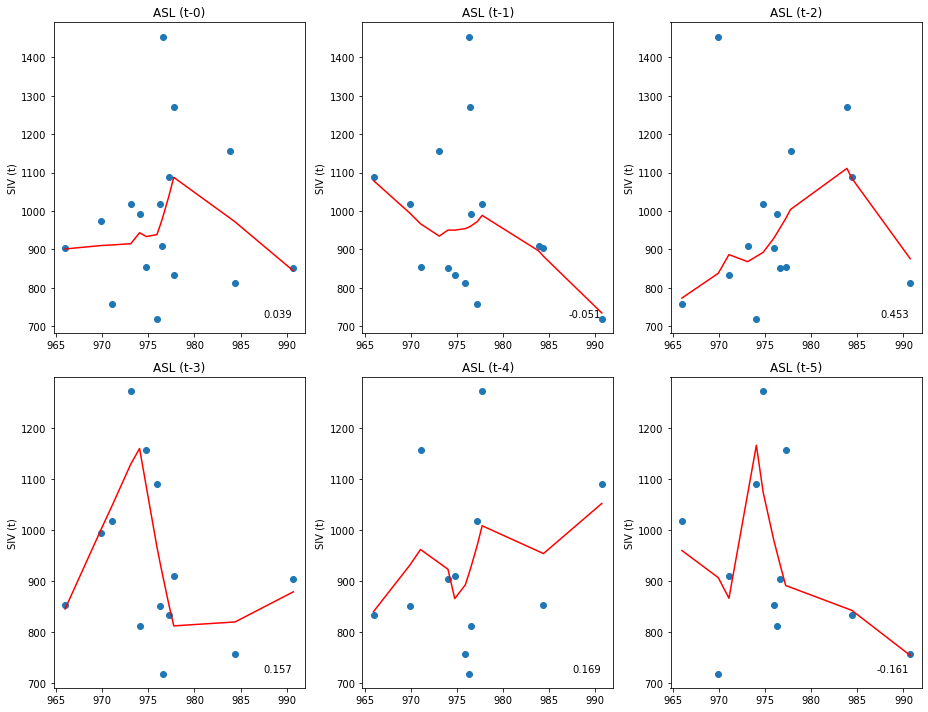

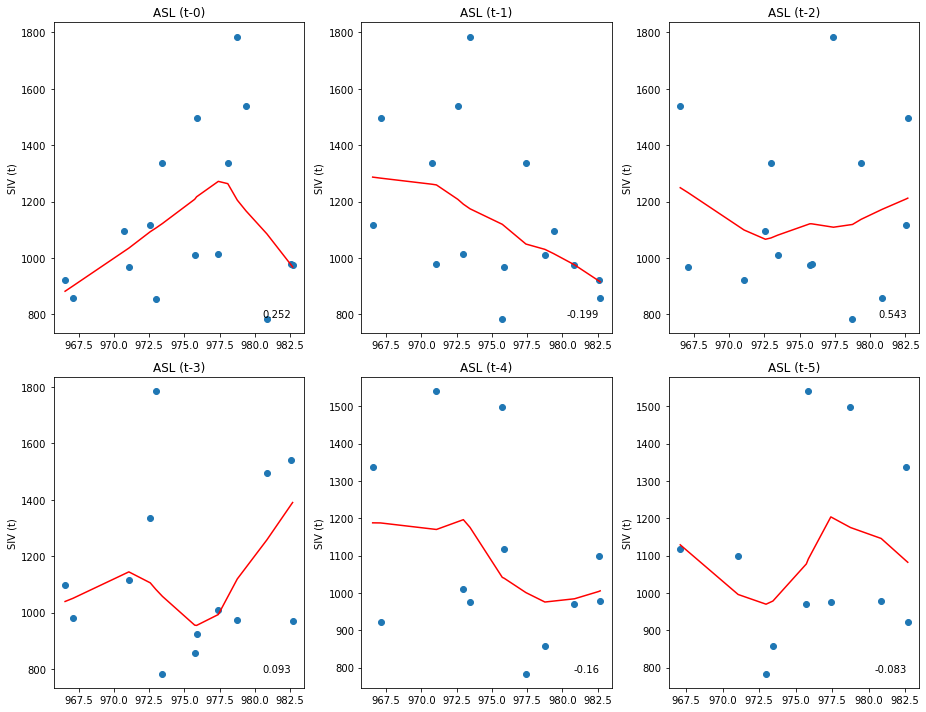

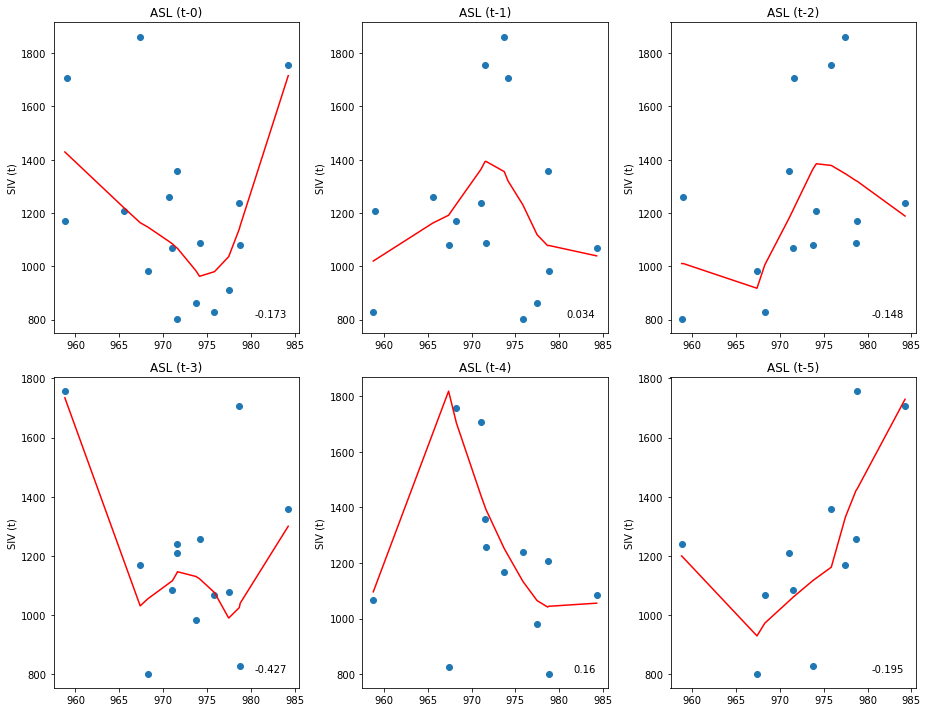

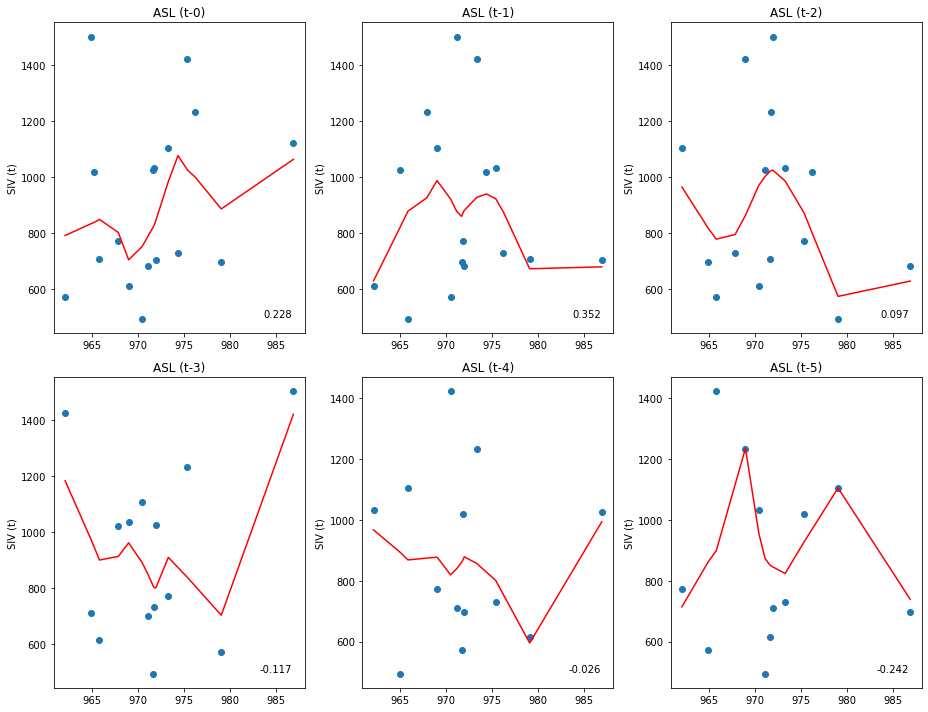

In [28]:
month_ccf_asl(df_new_asl)